In [334]:
from operator import truediv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [335]:
df = pd.read_csv("athlete_events.csv")
region_df = pd.read_csv("noc_regions.csv")

In [336]:
df = df[df['Season'] == 'Summer']

In [337]:
df.shape

(222552, 15)

In [338]:
df = df.merge(region_df, on='NOC', how='left')

In [339]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [340]:
df.duplicated().sum()

np.int64(1385)

## Medal Tally

In [341]:
df.drop_duplicates(inplace = True)

In [342]:
df = pd.concat([df,pd.get_dummies(df['Medal'])], axis=1)
df['Gold'] = df['Gold'].astype(int)
df['Silver'] = df['Silver'].astype(int)
df['Bronze'] = df['Bronze'].astype(int)

In [343]:
df = df.T.drop_duplicates().T

In [344]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold' , ascending = False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [345]:
Medal_Tally = df.drop_duplicates(subset = ['Team' , 'NOC' ,'Games' ,'Year', 'City','Sport','Event' ,'Medal' ])

In [346]:
Medal_Tally = Medal_Tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold' , ascending = False).reset_index()

In [347]:
Medal_Tally['total'] = Medal_Tally['Gold'] + Medal_Tally['Silver'] + Medal_Tally['Bronze']

In [348]:
Medal_Tally

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [349]:
years = df['Year'].unique().tolist()

In [350]:
years.sort()

In [351]:
years.insert(0,'All')

In [352]:
country = np.unique(df['region'].dropna().tolist())

In [353]:
country = country.tolist()

In [354]:
country.insert(0,'All')

In [355]:
medal_df = df.drop_duplicates(subset = ['Team' , 'NOC' ,'Games' ,'Year', 'City','Sport','Event' ,'Medal' ])

In [356]:
medal_df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [357]:
def fetch_medal_tally(df,year,country):
    flag = 0
    if year == 'All' and country == 'All':
        temp_df = medal_df
    elif year == 'All' and country != 'All':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    elif year != 'All' and country == 'All':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    else :
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']
    print(x)

## Overall Analysis

#### No. of editions
#### No. of cities
#### No. of events/sports
#### No. of athletes
#### Participating countries


In [358]:
df['Sport'].unique()
df['City'].unique()
df['Year'].unique().shape[0]
df['Event'].unique().shape[0]
df['Name'].unique().shape[0]

116122

In [359]:
nations_every_year = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')
nations_every_year.rename(columns = {'count':'Countries'},inplace = True)

In [360]:
import plotly

In [361]:
import plotly.express as px

In [362]:
fig = px.line(nations_every_year, x='Year', y='Countries')
fig.show()

In [363]:
x = df.drop_duplicates(['Year','Sport','Event'])

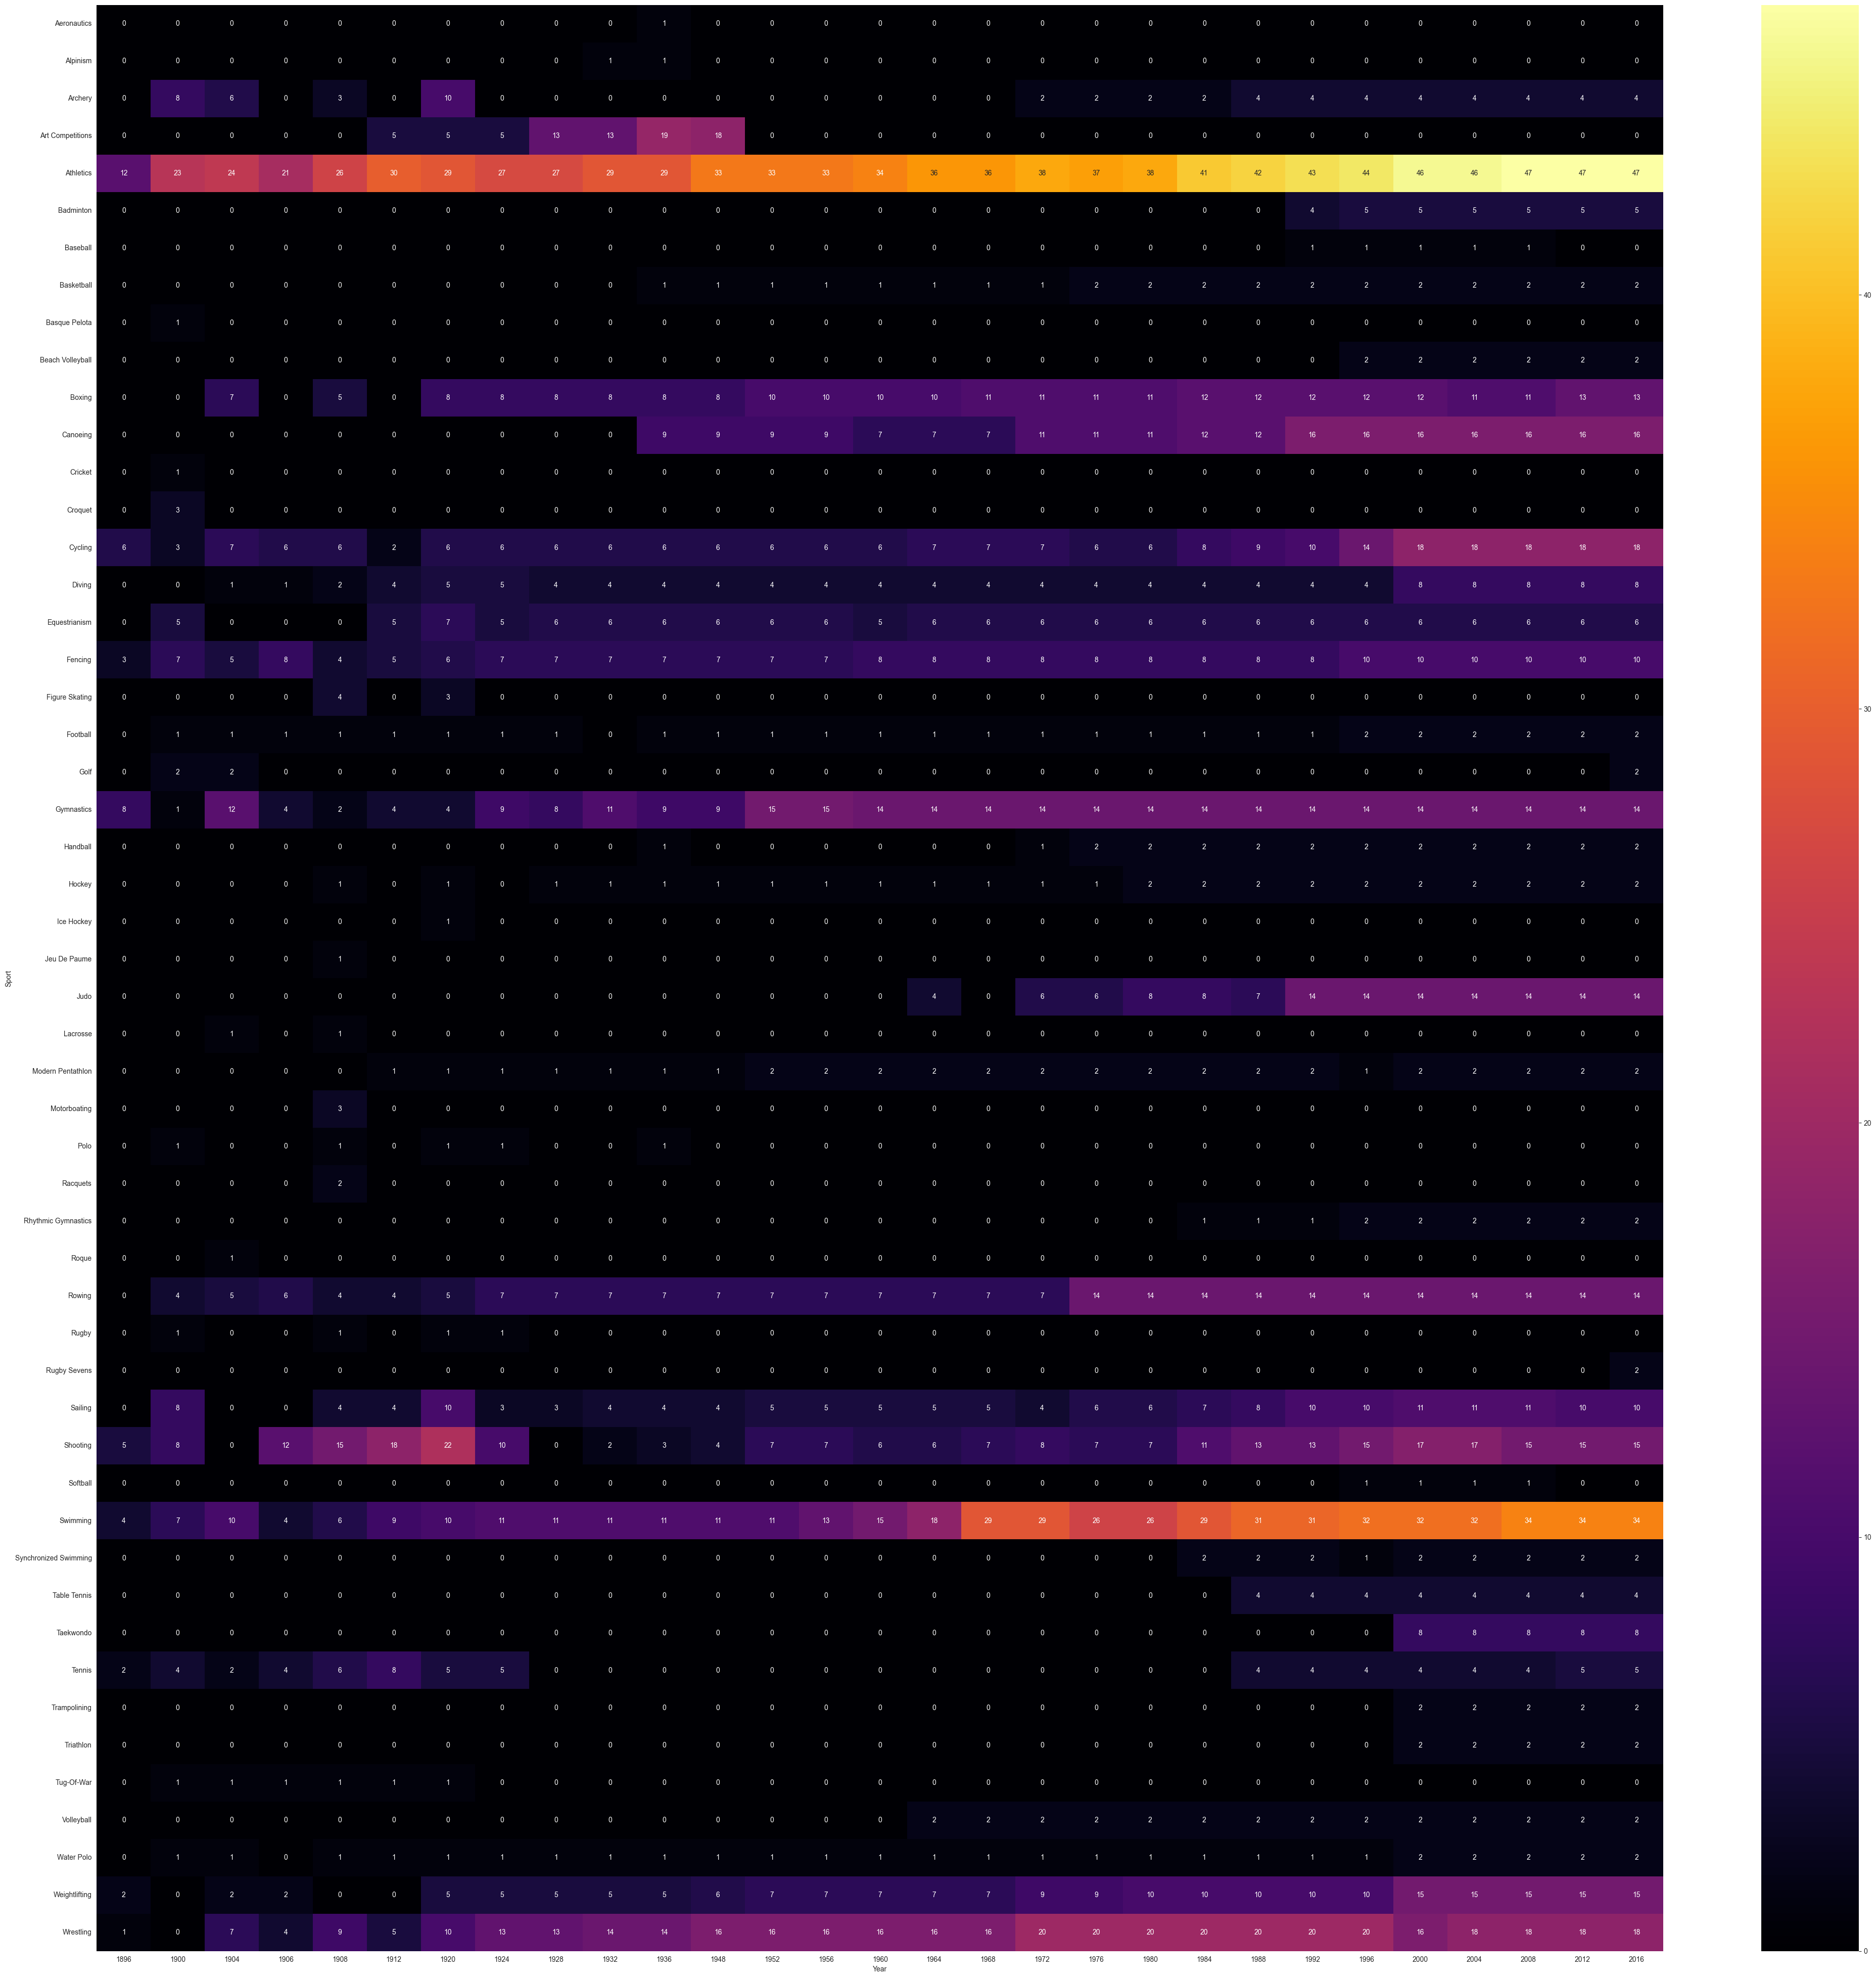

In [364]:
from numpy import astype
plt.figure(figsize = (50,50))
sns.heatmap(x.pivot_table(index = 'Sport' , columns = 'Year', values = 'Event', aggfunc = 'count').fillna(0).astype(int),cmap='inferno',annot=True,fmt = 'd')
plt.show()

In [365]:
def most_successful(df,sport):
    temp_df = df.dropna(subset=['Medal'])
    if sport != 'All':
        temp_df = temp_df[temp_df['Sport'] == sport]
    top_players = (temp_df['Name'].value_counts().reset_index().rename(columns={'index': 'Name', 'Name': 'Medal'}).head(15))
    final_df = top_players.merge(df[['Name', 'Sport', 'region']],left_on = 'Medal',right_on='Name',how='left')
    return final_df.drop_duplicates('Name')

## Country Wise Analysis
#### Country wise medal tally per year
#### what countries are good at heatmap
#### most successful athletes(top 10)

In [366]:
temp_df = df.dropna(subset = ['Medal'])

In [367]:
temp_df.drop_duplicates(subset = ['Team' , 'NOC' ,'Games' ,'Year', 'City','Sport','Event' ,'Medal' ],inplace = True)

In [368]:
new_df = temp_df[temp_df['region'] == 'India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [369]:
fig = px.line(final_df, x='Year', y='Medal')
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

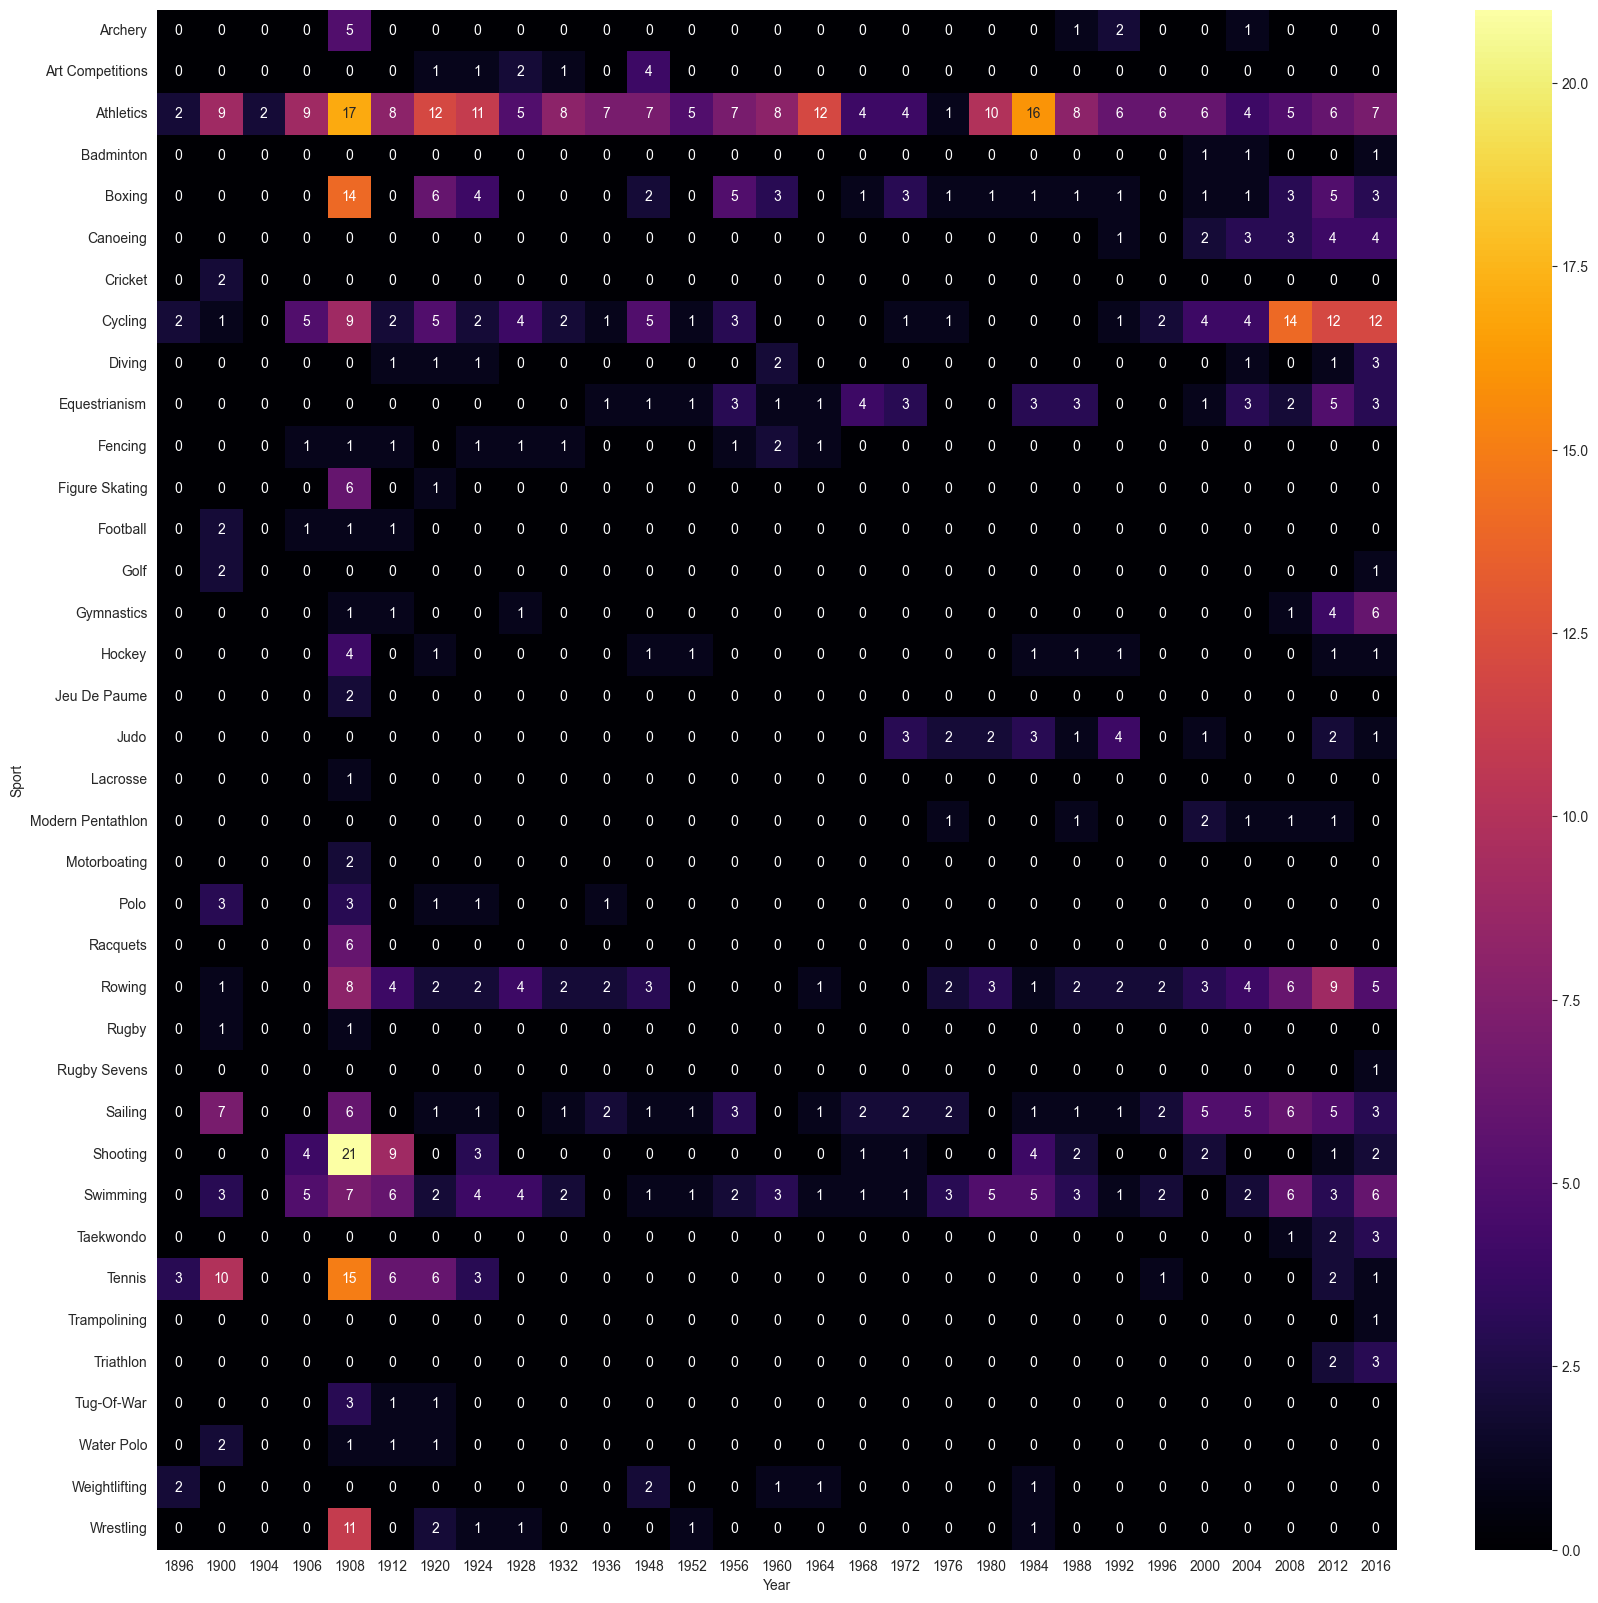

In [370]:
new_df = temp_df[temp_df['region'] == 'UK']
plt.figure(figsize = (20,20))
sns.heatmap(new_df.pivot_table(index = 'Sport',columns = 'Year' , values = 'Medal' , aggfunc = 'count').fillna(0).astype(int),annot=True,cmap = 'inferno' , fmt='d')

In [371]:
def most_successful(df,country):
    temp_df = df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['region'] == country]
    top_players = (temp_df['Name'].value_counts().reset_index().rename(columns={'index': 'Name', 'Name': 'Medal'}).head(15))
    final_df = top_players.merge(df[['Name', 'Sport']],left_on = 'Medal',right_on='Name',how='left')
    return final_df.drop_duplicates('Name')

In [372]:
import plotly.figure_factory as ff

In [373]:
athlete_df = df.drop_duplicates(subset = ['Name','region'])

In [374]:
x1 = athlete_df['Age'].dropna().astype(float).tolist()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna().astype(float).tolist()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna().astype(float).tolist()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna().astype(float).tolist()

In [375]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist' , 'Silver Medalist','Bronze Medalist'],show_hist = False,show_rug= False)
fig.show()

In [376]:
famous_sports = df['Sport'].unique().tolist()

In [377]:
x = []
name = []
for sports in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sports]
    x.append(temp_df[temp_df['Medal'] == 'Gold'].dropna())
    name.append(sports)

In [378]:
athlete_df['Medal'].fillna('No Medal',inplace = True)

C:\Users\animesh jain\AppData\Local\Temp\ipykernel_13212\3264060859.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<Axes: xlabel='Weight', ylabel='Height'>

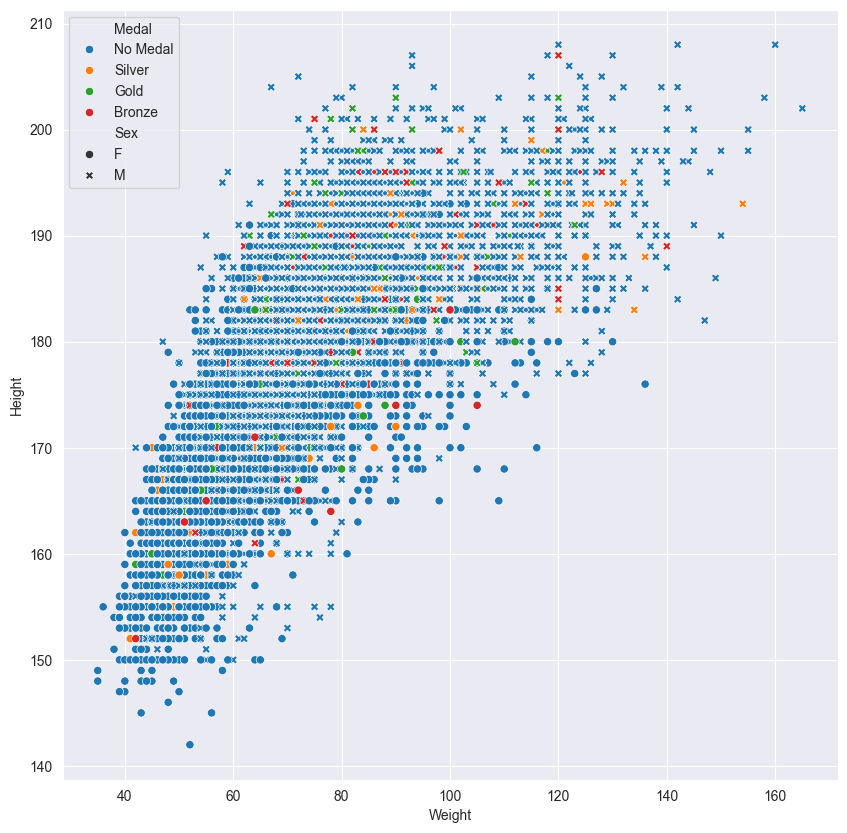

In [379]:
plt.figure(figsize = (10,10))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(x=temp_df['Weight'], y=temp_df['Height'],hue = temp_df['Medal'],style = temp_df['Sex'])

In [380]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [381]:
final_df = men.merge(women , on = 'Year',how = 'left')
final_df.rename(columns = {'Name_x':'Male','Name_y':'Female'}, inplace = True)

In [382]:
final_df.fillna(0,inplace = True)

In [383]:
fig = px.line(final_df, x = 'Year' , y = ['Male', 'Female'])
fig.show()